In [1]:
import pandas as pd
import scipy
import numpy as np
import scipy.sparse as sp
import scipy.io as spio

from scipy.stats import pearsonr

import operator
import matplotlib.pyplot as plt

import matplotlib.cm as cm
import matplotlib.colors as colors

import matplotlib as mpl
from matplotlib.text import TextPath
from matplotlib.patches import PathPatch, Rectangle
from matplotlib.font_manager import FontProperties
from matplotlib import gridspec
from matplotlib.ticker import FormatStrFormatter
from sklearn.metrics import roc_auc_score

import seaborn as sns
import matplotlib.collections as collections

import isolearn.io as isoio

from analyze_aparent_designed_mpra_helpers import *


<h2>LoFi vs. HiFi Array replicates</h2>

In [2]:
#Load designed MPRA data (Not collapsed over experiment replicates)
seq_ver_dict = isoio.load('../data/prepared_data/apa_array_data/apa_array_data_master_seq_ver')
seq_ver_df = seq_ver_dict['array_df']
seq_ver_cuts = seq_ver_dict['pooled_cuts']

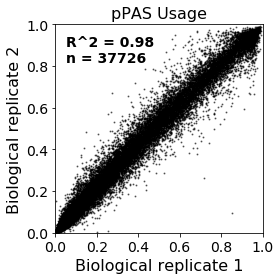

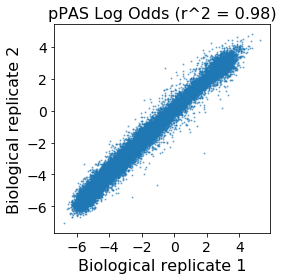

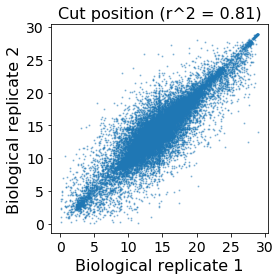

In [3]:
#Barcode-Pooled LoFi vs. Barcode-Pooled HiFi

save_figs = False

seq_ver_df_not_nan = seq_ver_df#.loc[~(np.isnan(seq_ver_df['mean_proximal_logodds']) | np.isinf(seq_ver_df['mean_proximal_logodds']))]

seq_ver_df_lo = seq_ver_df_not_nan.query("array_version == 'lofi' and n_barcodes >= 2 and mean_total_count >= 50").copy()
seq_ver_df_hi = seq_ver_df_not_nan.query("array_version == 'hifi' and n_barcodes >= 2 and mean_total_count >= 50").copy()

seq_ver_df_joined = seq_ver_df_lo.set_index('master_seq').join(seq_ver_df_hi.set_index('master_seq'), lsuffix='_lo', rsuffix='_hi', how='inner')

#Isoform proportions

r_val, _ = pearsonr(seq_ver_df_joined['mean_proximal_usage_lo'], seq_ver_df_joined['mean_proximal_usage_hi'])

f = plt.figure(figsize=(4, 4))

plt.scatter(seq_ver_df_joined['mean_proximal_usage_lo'], seq_ver_df_joined['mean_proximal_usage_hi'], alpha=0.5, s=1, c='black')


annot_text = 'R^2 = ' + str(round(r_val * r_val, 2))
annot_text += '\nn = ' + str(len(seq_ver_df_joined))
ax = plt.gca()
ax.text(0.05, 0.95, annot_text, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes, color='black', fontsize=14, weight="bold")



plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel('Biological replicate 1', fontsize=16)
plt.ylabel('Biological replicate 2', fontsize=16)
plt.title('pPAS Usage', fontsize=16)

plt.xlim(0, 1)
plt.ylim(0, 1)

plt.tight_layout()

if save_figs :
    plt.savefig('lofi_vs_hifi_pas_usage.png', transparent=True, dpi=150)
    plt.savefig('lofi_vs_hifi_pas_usage.eps')

plt.show()

#Isoform log odds

r_val, _ = pearsonr(seq_ver_df_joined['mean_proximal_logodds_lo'], seq_ver_df_joined['mean_proximal_logodds_hi'])

f = plt.figure(figsize=(4, 4))

plt.scatter(seq_ver_df_joined['mean_proximal_logodds_lo'], seq_ver_df_joined['mean_proximal_logodds_hi'], alpha=0.5, s=1)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel('Biological replicate 1', fontsize=16)
plt.ylabel('Biological replicate 2', fontsize=16)
plt.title('pPAS Log Odds (r^2 = ' + str(round(r_val * r_val, 2)) + ')', fontsize=16)

plt.tight_layout()

if save_figs :
    plt.savefig('lofi_vs_hifi_pas_logodds.png', transparent=True, dpi=150)
    plt.savefig('lofi_vs_hifi_pas_logodds.eps')

plt.show()

#Avg cut

r_val, _ = pearsonr(seq_ver_df_joined['mean_proximal_avgcut_lo'], seq_ver_df_joined['mean_proximal_avgcut_hi'])

f = plt.figure(figsize=(4, 4))

plt.scatter(seq_ver_df_joined['mean_proximal_avgcut_lo'], seq_ver_df_joined['mean_proximal_avgcut_hi'], alpha=0.4, s=1)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel('Biological replicate 1', fontsize=16)
plt.ylabel('Biological replicate 2', fontsize=16)
plt.title('Cut position (r^2 = ' + str(round(r_val * r_val, 2)) + ')', fontsize=16)

plt.tight_layout()

if save_figs :
    plt.savefig('lofi_vs_hifi_cutpos.png', transparent=True, dpi=150)
    plt.savefig('lofi_vs_hifi_cutpos.eps')

plt.show()
